# Import packages

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout,concatenate,Flatten,Conv1D, MaxPooling1D,Conv2D, MaxPooling2D,Reshape,Input,Convolution1D,Activation,concatenate,SimpleRNN
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.metrics import roc_auc_score  
from tensorflow.keras import layers 
from keras.utils import np_utils

# Split Data

In [13]:
Mult_data = pd.read_csv('./Data/pccs_julei_7.csv')
Mult_data

,Unnamed: 0,MI_dir_L5_variance,MI_dir_L3_variance,MI_dir_L1_variance,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_variance,H_L5_variance,H_L3_variance,H_L1_variance,...,HpHp_L0.1_std,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_std,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,class
0,0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.0,0.0,1.000000,0.000000,0.000000e+00,0.0,0.0,0
1,1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000005,0.004575,4.295839,...,5.839096,3.409505e+01,0.0,0.0,5.319895,4.710446,2.218830e+01,0.0,0.0,0
2,2,35.789338,35.923972,35.991542,35.999915,1.999693,35.999999,35.789342,35.928490,40.398803,...,10.004075,1.000815e+02,0.0,0.0,6.318264,9.034660,8.162508e+01,0.0,0.0,0
3,3,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.0,0.0,1.000000,0.000000,0.000000e+00,0.0,0.0,0
4,4,18487.448750,18928.175300,19153.795810,19181.965180,1.999230,19182.247150,18487.448750,18928.175300,19153.795810,...,0.000000,0.000000e+00,0.0,0.0,1.000000,0.000000,0.000000e+00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132550,132550,51475.879187,56787.500904,60928.481976,60304.327937,15532.787220,60163.169053,51475.879187,56787.500904,60928.481976,...,0.000025,6.402843e-10,0.0,0.0,8678.383392,0.000013,1.746230e-10,0.0,0.0,1
132551,132551,51906.095775,56969.089730,60936.478575,60301.987018,15533.778595,60162.354820,51906.095775,56969.089730,60936.478575,...,0.000025,6.402843e-10,0.0,0.0,8679.378573,0.000013,1.746230e-10,0.0,0.0,1
132552,132552,52321.045926,57145.104258,60944.013909,60299.643124,15534.778287,60161.540299,52321.045926,57145.104258,60944.013909,...,0.000026,6.984919e-10,0.0,0.0,8680.378401,0.000013,1.746230e-10,0.0,0.0,1
132553,132553,52725.825097,57316.853508,60951.108872,60297.295711,15535.414869,60160.725470,52725.825097,57316.853508,60951.108872,...,0.000026,6.984919e-10,0.0,0.0,8681.175334,0.000013,1.746230e-10,0.0,0.0,1


In [14]:
null_counts = Mult_data.isnull().sum()
null_counts

Unnamed: 0               0
MI_dir_L5_variance       0
MI_dir_L3_variance       0
MI_dir_L1_variance       0
MI_dir_L0.1_variance     0
MI_dir_L0.01_weight      0
MI_dir_L0.01_variance    0
H_L5_variance            0
H_L3_variance            0
H_L1_variance            0
H_L0.1_variance          0
H_L0.01_weight           0
H_L0.01_variance         0
HH_L5_std                0
HH_L5_radius             0
HH_L5_covariance         0
HH_L5_pcc                0
HH_L3_std                0
HH_L3_radius             0
HH_L3_covariance         0
HH_L3_pcc                0
HH_L1_radius             0
HH_L1_covariance         0
HH_L1_pcc                0
HH_L0.1_radius           0
HH_L0.1_covariance       0
HH_L0.01_radius          0
HH_L0.01_covariance      0
HH_jit_L5_variance       0
HH_jit_L3_variance       0
HpHp_L5_weight           0
HpHp_L5_std              0
HpHp_L5_radius           0
HpHp_L5_covariance       0
HpHp_L5_pcc              0
HpHp_L3_weight           0
HpHp_L3_std              0
H

In [15]:
del Mult_data['Unnamed: 0']  # 删除'Unnamed: 0'

In [16]:
Mult_data['class'].value_counts()

1    50000
2    48657
0    33898
Name: class, dtype: int64

In [17]:
X = Mult_data.drop(columns=['class'],axis=1)
Y = Mult_data['class']

scaler = StandardScaler()   
X = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((106044, 54), (26511, 54), (106044,), (26511,))

# 计算指标

### 计算Accuary,F1等

In [7]:
def evaluate_model_performance(y_test,y_pred_labels):
    
    # Convert y_test to label indices if it's in One-Hot format
    if y_test.ndim > 1:
        y_test_labels = np.argmax(y_test, axis=1)
    else:
        y_test_labels = y_test

    # Calculate performance metrics
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels, average='macro')
    recall = recall_score(y_test_labels, y_pred_labels, average='macro')
    f1 = f1_score(y_test_labels, y_pred_labels, average='macro')

    # Print the metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def evaluate_model_performance(y_test, y_pred_labels):
    
    # Convert y_test to label indices if it's in One-Hot format
    if y_test.ndim > 1:
        y_test_labels = np.argmax(y_test, axis=1)
    else:
        y_test_labels = y_test

    # Calculate performance metrics
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels, average=None)
    recall = recall_score(y_test_labels, y_pred_labels, average=None)
    f1 = f1_score(y_test_labels, y_pred_labels, average=None)

    # Print overall metrics
    print(f"Overall Accuracy: {accuracy}")
    print(f"Overall Precision (Macro Average): {np.mean(precision):.4f}")
    print(f"Overall Recall (Macro Average): {np.mean(recall):.4f}")
    print(f"Overall F1 Score (Macro Average): {np.mean(f1):.4f}")

    # Print metrics for each class
    for i in range(len(precision)):
        print(f"\nMetrics for Class {i}:")
        print(f"Accuracy: {accuracy}")  # Accuracy is overall, not per-class
        print(f"Precision: {precision[i]:.4f}")
        print(f"Recall: {recall[i]:.4f}")
        print(f"F1 Score: {f1[i]:.4f}")

# Example usage
# y_test = [actual labels]
# y_pred_labels = [predicted labels]
# evaluate_model_performance(y_test, y_pred_labels)


### 计算FPR,FDR,FOR,FNR函数

In [19]:
def calculate_metrics_multiclass(y_true, y_pred, num_classes):
    # 初始化指标总和
    total_fpr, total_fdr, total_for, total_fnr = 0, 0, 0, 0

    for cls in range(num_classes):
        y_true_binary = (y_true == cls).astype(int)
        y_pred_binary = (y_pred == cls).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true_binary, y_pred_binary).ravel()

        FPR = fp / (fp + tn) if (fp + tn) > 0 else 0
        FDR = fp / (fp + tp) if (fp + tp) > 0 else 0
        FOR = fn / (fn + tn) if (fn + tn) > 0 else 0
        FNR = fn / (fn + tp) if (fn + tp) > 0 else 0

        total_fpr += FPR
        total_fdr += FDR
        total_for += FOR
        total_fnr += FNR

    # 计算平均值
    avg_fpr = total_fpr / num_classes
    avg_fdr = total_fdr / num_classes
    avg_for = total_for / num_classes
    avg_fnr = total_fnr / num_classes

    # 打印整体指标
    print(f"Overall FPR: {avg_fpr}")
    print(f"Overall FDR: {avg_fdr}")
    print(f"Overall FOR: {avg_for}")
    print(f"Overall FNR: {avg_fnr}")
    
    return avg_fpr, avg_fdr, avg_for, avg_fnr

### 计算TNR,MCC,NPV函数

In [20]:
from math import sqrt
from sklearn.metrics import confusion_matrix

def calculate_multiclass_tnr_mcc_npv(y_true, y_pred, num_classes):
    total_tnr, total_mcc, total_npv = 0, 0, 0

    for cls in range(num_classes):
        y_true_binary = (y_true == cls).astype(int)
        y_pred_binary = (y_pred == cls).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true_binary, y_pred_binary).ravel()

        TNR = tn / (tn + fp) if (tn + fp) > 0 else 0
        NPV = tn / (tn + fn) if (tn + fn) > 0 else 0
        denominator = sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
        MCC = (tp * tn - fp * fn) / denominator if denominator != 0 else 0

        total_tnr += TNR
        total_mcc += MCC
        total_npv += NPV

    avg_tnr = total_tnr / num_classes
    avg_mcc = total_mcc / num_classes
    avg_npv = total_npv / num_classes

    # 打印整体指标
    print(f"Overall TNR: {avg_tnr}")
    print(f"Overall MCC: {avg_mcc}")
    print(f"Overall NPV: {avg_npv}")

    return avg_tnr, avg_mcc, avg_npv

### 绘制混淆矩阵

In [11]:
def plot_confusion_matrix(y_true, y_pred, color, title, save_path):
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_true, y_pred)
    labels = ["Beigen", "Mirai", "Gafgyt"]  # Customize as needed
    sns.heatmap(cm, annot=True, cmap=color, fmt="d", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(title, fontweight='bold', fontsize=12)
    plt.savefig(save_path)
    plt.show()

### 绘制ROC曲线

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_multiclass_roc(y_true, y_score, num_classes, color, title, save_path):
    """
    Plot and save a multi-class ROC curve without showing 'area' in the legend, 
    but instead showing the AUC score for each class.
    
    Args:
    y_true (numpy.ndarray): True labels.
    y_score (numpy.ndarray): Predicted scores or probabilities.
    num_classes (int): Number of classes.
    title (str): Title of the plot.
    color (str): Color of the micro-average ROC curve.
    save_path (str): Path to save the plot.
    
    Returns:
    None
    """
    # Binarize the true labels
    y_true = label_binarize(y_true, classes=range(num_classes))
    figsize = (6, 4)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Plot
    plt.figure(figsize=figsize)
    plt.plot(fpr["micro"], tpr["micro"],
             label='Grand Average of all classes-(AUC = {0:0.4f})'.format(roc_auc["micro"]),
             color=color, linestyle=':', linewidth=4)
    
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label='ROC curve of Class {0} AUC = {1:0.4f}'.format(i, roc_auc[i]))  # Changed label here
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontweight='bold', fontsize=12)
    plt.legend(loc="lower right")
    plt.savefig(save_path)
    plt.show()


# MULT_Model

### BiLSTM

In [21]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.metrics import Precision, Recall
from sklearn.metrics import classification_report, accuracy_score
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

# 对目标变量进行编码
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(y_train)
dummy_y_train = np_utils.to_categorical(encoded_Y)

encoded_Y_test = encoder.transform(y_test)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)

# 定义模型
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # 输出层有3个神经元，对应3个分类

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# 重塑特征以适用于LSTM层
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 训练模型
history = model.fit(X_train_reshaped, dummy_y_train, epochs=10, batch_size=64, validation_split=0.2)

# 预测
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# 评估模型
y_test_classes = np.argmax(dummy_y_test, axis=1)
print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))


Epoch 1/10
   7/1326 [..............................] - ETA: 4:27:29 - loss: 0.9397 - accuracy: 0.5647 - precision_1: 0.9857 - recall_1: 0.1540

In [15]:
evaluate_model_performance(y_test_classes, y_pred_classes)

Overall Accuracy: 0.8385198596808872
Overall Precision (Macro Average): 0.8584
Overall Recall (Macro Average): 0.8535
Overall F1 Score (Macro Average): 0.8269

Metrics for Class 0:
Accuracy: 0.8385198596808872
Precision: 0.6389
Recall: 0.9988
F1 Score: 0.7793

Metrics for Class 1:
Accuracy: 0.8385198596808872
Precision: 0.9706
Recall: 0.9800
F1 Score: 0.9753

Metrics for Class 2:
Accuracy: 0.8385198596808872
Precision: 0.9657
Recall: 0.5819
F1 Score: 0.7262


In [16]:
# 计算指标
num_classes = 3  # 假设有 3 个类别
avg_fpr, avg_fdr, avg_for, avg_fnr = calculate_metrics_multiclass(y_test_classes, y_pred_classes, num_classes)

Overall FPR: 0.07366729363508914
Overall FDR: 0.1415926788032566
Overall FOR: 0.07001821772869804
Overall FNR: 0.14645903008360323


In [17]:
avg_tnr, avg_mcc, avg_npv = calculate_multiclass_tnr_mcc_npv(y_test_classes, y_pred_classes, num_classes)

Overall TNR: 0.9263327063649109
Overall MCC: 0.7799966659371126
Overall NPV: 0.929981782271302


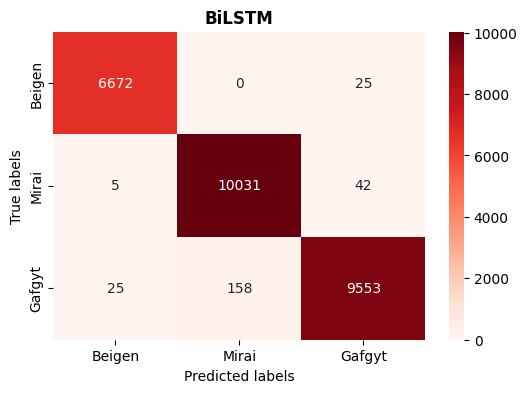

In [21]:
plot_confusion_matrix(y_test_classes, y_pred_classes, "Reds","BiLSTM","./Picture/BiLSTM_juzehn.png")

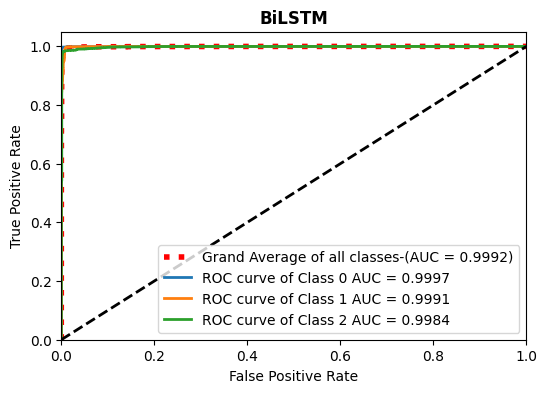

In [29]:
plot_multiclass_roc(y_test_classes, y_pred , num_classes, "red","BiLSTM","./Picture/BiLSTM_ROC.png")

### Transformer

In [14]:
from tensorflow.keras.layers import Reshape, Dense, Dropout, Flatten
import tensorflow_addons as tfa
from tensorflow.keras import Input, Model

# 定义模型输入
input_layer = Input(shape=(X_train.shape[1],))

# 调整输入以符合MultiHeadAttention的要求
reshaped_input = Reshape((X_train.shape[1], 1))(input_layer)

# 定义Transformer层
transformer_block = reshaped_input
for _ in range(2):
    transformer_block = tfa.layers.MultiHeadAttention(head_size=64, num_heads=4)([transformer_block, transformer_block, transformer_block])
    transformer_block = Dense(64, activation='relu')(transformer_block)
    transformer_block = Dropout(0.1)(transformer_block)

# 应用Flatten层
transformer_block = Flatten()(transformer_block)

# 定义输出层
output_layer = Dense(3, activation='softmax')(transformer_block)

# 创建模型
model = Model(inputs=input_layer, outputs=output_layer)

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# 训练模型
history = model.fit(X_train, dummy_y_train, epochs=10, batch_size=64, validation_split=0.2)

# 预测
y_pred_2 = model.predict(X_test)        
y_pred_classes_2 = np.argmax(y_pred_2, axis=1)

# 评估模型
y_test_classes_2 = np.argmax(dummy_y_test, axis=1)
print("Accuracy:", accuracy_score(y_test_classes_2, y_pred_classes_2))
print(classification_report(y_test_classes_2, y_pred_classes_2))


d:\Anaconda\envs\pycharm\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
d:\Anaconda\envs\pycharm\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/10
1326/1326 [==============================] - 28s 20ms/step - loss: 0.5906 - accuracy: 0.7058 - precision_1: 0.7103 - recall_1: 0.6987 - val_loss: 0.5158 - val_accuracy: 0.7377 - val_precision_1: 0.7379 - val_recall_1: 0.7377
Epoch 2/10
1326/1326 [==============================] - 27s 20ms/step - loss: 0.4749 - accuracy: 0.7593 - precision_1: 0.7593 - recall_1: 0.7590 - val_loss: 0.4480 - val_accuracy: 0.7673 - val_precision_1: 0.7673 - val_recall_1: 0.7673
Epoch 3/10
1326/1326 [==============================] - 27s 20ms/step - loss: 0.4582 - accuracy: 0.7649 - precision_1: 0.7650 - recall_1: 0.7649 - val_loss: 0.4413 - val_accuracy: 0.7709 - val_precision_1: 0.7709 - val_recall_1: 0.7709
Epoch 4/10
1326/1326 [==============================] - 27s 20ms/step - loss: 0.4500 - accuracy: 0.7658 - precision_1: 0.7659 - recall_1: 0.7657 - val_loss: 0.4410 - val_accuracy: 0.7675 - val_precision_1: 0.7676 - val_recall_1: 0.7674
Epoch 5/10
1326/1326 [==============================] - 

In [18]:
evaluate_model_performance(y_test_classes_2, y_pred_classes_2)

Overall Accuracy: 0.7656444494738033
Overall Precision (Macro Average): 0.8103
Overall Recall (Macro Average): 0.7874
Overall F1 Score (Macro Average): 0.7360

Metrics for Class 0:
Accuracy: 0.7656444494738033
Precision: 0.6385
Recall: 1.0000
F1 Score: 0.7794

Metrics for Class 1:
Accuracy: 0.7656444494738033
Precision: 0.8090
Recall: 0.9926
F1 Score: 0.8915

Metrics for Class 2:
Accuracy: 0.7656444494738033
Precision: 0.9833
Recall: 0.3696
F1 Score: 0.5372


In [19]:
# 计算指标
num_classes = 3  # 假设有 3 个类别
avg_fpr, avg_fdr, avg_for, avg_fnr = calculate_metrics_multiclass(y_test_classes_2, y_pred_classes_2, num_classes)

Overall FPR: 0.11288001353119408
Overall FDR: 0.18969651918291208
Overall FOR: 0.09129980396009685
Overall FNR: 0.21262855560645044


In [20]:
avg_tnr, avg_mcc, avg_npv = calculate_multiclass_tnr_mcc_npv(y_test_classes_2, y_pred_classes_2, num_classes)

Overall TNR: 0.8871199864688059
Overall MCC: 0.6853318877060716
Overall NPV: 0.908700196039903


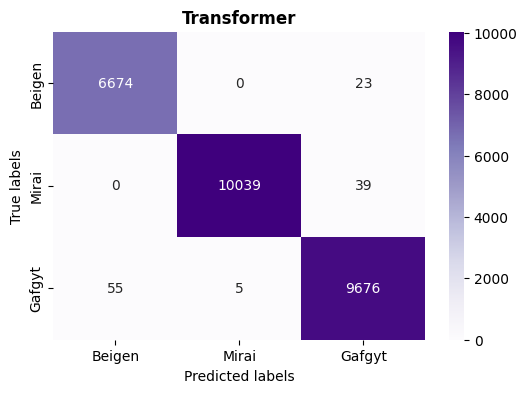

In [82]:
plot_confusion_matrix(y_test_classes_2, y_pred_classes_2, "Purples","Transformer","./Picture/transformer_juzehn.png")

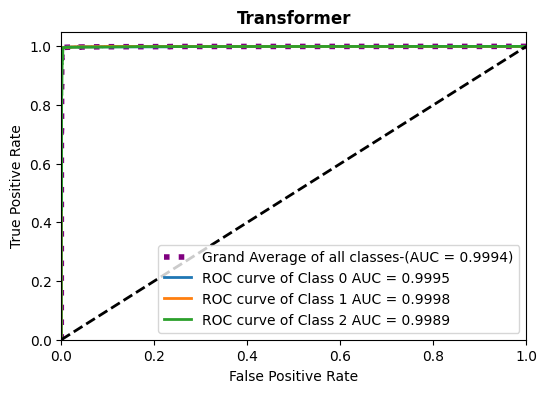

In [83]:
plot_multiclass_roc(y_test_classes_2, y_pred_2 , num_classes, "purple","Transformer","./Picture/transformer_ROC.png")

### BiLSTM-transformer

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import Input, Dense, Dropout, Bidirectional, LSTM, BatchNormalization, LayerNormalization, Flatten, Add
from tensorflow.keras.models import Model
import tensorflow_addons as tfa
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from keras.metrics import Precision, Recall
import numpy as np

def transformer_block(x, head_size=32, num_heads=2, ff_dim=32, dropout=0.1):
    # 多头注意力
    attn_output = tfa.layers.MultiHeadAttention(head_size=head_size, num_heads=num_heads)([x, x, x])
    attn_output = Dropout(dropout)(attn_output)
    # 残差连接 + LayerNorm
    x = Add()([x, attn_output])
    x = LayerNormalization()(x)
    
    # 前馈网络
    ff_output = Dense(ff_dim, activation='relu')(x)
    ff_output = Dense(x.shape[-1])(ff_output)  # 输出维度要跟输入一样，方便Add
    ff_output = Dropout(dropout)(ff_output)
    # 残差连接 + LayerNorm
    x = Add()([x, ff_output])
    x = LayerNormalization()(x)
    return x

# 重塑数据以适用于模型
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 5折交叉验证
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_per_fold = []

for train_idx, val_idx in kfold.split(X_train, y_train):
    X_tr, X_val = X_train_reshaped[train_idx], X_train_reshaped[val_idx]
    y_tr, y_val = dummy_y_train[train_idx], dummy_y_train[val_idx]

    input_layer = Input(shape=(X_tr.shape[1], 1))

    # BiLSTM层
    x = Bidirectional(LSTM(64, return_sequences=True))(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    # Transformer块
    x = transformer_block(x, head_size=32, num_heads=2, ff_dim=64, dropout=0.1)

    # Flatten层
    x = Flatten()(x)

    # 输出层
    output_layer = Dense(3, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(X_tr, y_tr, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

    y_val_pred = model.predict(X_val)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_classes = np.argmax(y_val, axis=1)

    acc_per_fold.append(accuracy_score(y_val_classes, y_val_pred_classes))
    precision_per_fold.append(precision_score(y_val_classes, y_val_pred_classes, average=None))
    recall_per_fold.append(recall_score(y_val_classes, y_val_pred_classes, average=None))
    f1_per_fold.append(f1_score(y_val_classes, y_val_pred_classes, average=None))

# 转为数组
precision_per_fold = np.array(precision_per_fold)
recall_per_fold = np.array(recall_per_fold)
f1_per_fold = np.array(f1_per_fold)

def summarize_scores(scores, metric_name):
    print(f"\n{metric_name} per class:")
    for i in range(scores.shape[1]):
        mean = np.mean(scores[:, i])
        std = np.std(scores[:, i])
        ci95 = 1.96 * std / np.sqrt(scores.shape[0])
        print(f"Class {i}: Mean = {mean:.4f}, Std = {std:.4f}, 95% CI = [{(mean-ci95):.4f}, {(mean+ci95):.4f}]")

print(f"\nAccuracy: Mean = {np.mean(acc_per_fold):.4f}, Std = {np.std(acc_per_fold):.4f}, 95% CI = [{(np.mean(acc_per_fold)-1.96*np.std(acc_per_fold)/np.sqrt(len(acc_per_fold))):.4f}, {(np.mean(acc_per_fold)+1.96*np.std(acc_per_fold)/np.sqrt(len(acc_per_fold))):.4f}]")
summarize_scores(precision_per_fold, "Precision")
summarize_scores(recall_per_fold, "Recall")
summarize_scores(f1_per_fold, "F1-Score")

# 用独立测试集评估
input_layer = Input(shape=(X_train.shape[1], 1))
x = Bidirectional(LSTM(64, return_sequences=True))(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = transformer_block(x, head_size=32, num_heads=2, ff_dim=64, dropout=0.1)
x = Flatten()(x)
output_layer = Dense(3, activation='softmax')(x)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
model.fit(X_train_reshaped, dummy_y_train, epochs=10, batch_size=32, verbose=1)

# 测试集预测
y_pred_3 = model.predict(X_test_reshaped)
y_pred_classes_3 = np.argmax(y_pred_3, axis=1)
y_test_classes_3 = np.argmax(dummy_y_test, axis=1)

print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test_classes_3, y_pred_classes_3))
print(classification_report(y_test_classes_3, y_pred_classes_3))


Epoch 1/10


d:\Anaconda\envs\pycharm\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


2652/2652 [==============================] - 100s 35ms/step - loss: 0.4574 - accuracy: 0.7584 - precision_2: 0.7613 - recall_2: 0.7548 - val_loss: 0.4373 - val_accuracy: 0.7858 - val_precision_2: 0.7858 - val_recall_2: 0.7858
Epoch 2/10
2652/2652 [==============================] - 89s 34ms/step - loss: 0.4175 - accuracy: 0.7720 - precision_2: 0.7726 - recall_2: 0.7713 - val_loss: 0.3547 - val_accuracy: 0.8226 - val_precision_2: 0.8226 - val_recall_2: 0.8226
Epoch 3/10
2652/2652 [==============================] - 90s 34ms/step - loss: 0.3994 - accuracy: 0.7793 - precision_2: 0.7813 - recall_2: 0.7773 - val_loss: 0.3435 - val_accuracy: 0.8151 - val_precision_2: 0.8152 - val_recall_2: 0.8150
Epoch 4/10
2652/2652 [==============================] - 91s 34ms/step - loss: 0.3552 - accuracy: 0.8172 - precision_2: 0.8175 - recall_2: 0.8169 - val_loss: 0.3269 - val_accuracy: 0.8399 - val_precision_2: 0.8399 - val_recall_2: 0.8398
Epoch 5/10
2652/2652 [==============================] - 86s 32ms/s

In [22]:
evaluate_model_performance(y_test_classes_3, y_pred_classes_3)

Overall Accuracy: 0.8375014145071857
Overall Precision (Macro Average): 0.8567
Overall Recall (Macro Average): 0.8527
Overall F1 Score (Macro Average): 0.8261

Metrics for Class 0:
Accuracy: 0.8375014145071857
Precision: 0.6390
Recall: 0.9990
F1 Score: 0.7794

Metrics for Class 1:
Accuracy: 0.8375014145071857
Precision: 0.9711
Recall: 0.9764
F1 Score: 0.9737

Metrics for Class 2:
Accuracy: 0.8375014145071857
Precision: 0.9601
Recall: 0.5827
F1 Score: 0.7252


In [23]:
# 计算指标
num_classes = 3  # 假设有 3 个类别
avg_fpr, avg_fdr, avg_for, avg_fnr = calculate_metrics_multiclass(y_test_classes_3, y_pred_classes_3, num_classes)

Overall FPR: 0.07420742045305273
Overall FDR: 0.1432749950407428
Overall FOR: 0.07072730205064229
Overall FNR: 0.14732607143380005


In [24]:
avg_tnr, avg_mcc, avg_npv = calculate_multiclass_tnr_mcc_npv(y_test_classes_3, y_pred_classes_3, num_classes)

Overall TNR: 0.9257925795469473
Overall MCC: 0.7781948029346478
Overall NPV: 0.9292726979493576


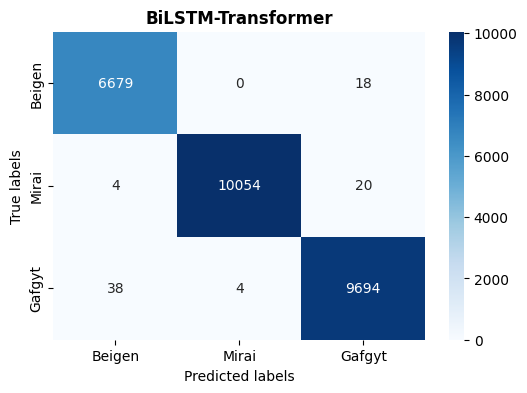

In [97]:
plot_confusion_matrix(y_test_classes_3, y_pred_classes_3, "Blues","BiLSTM-Transformer","./Picture/BiLSTM-transformer_juzehn.png")

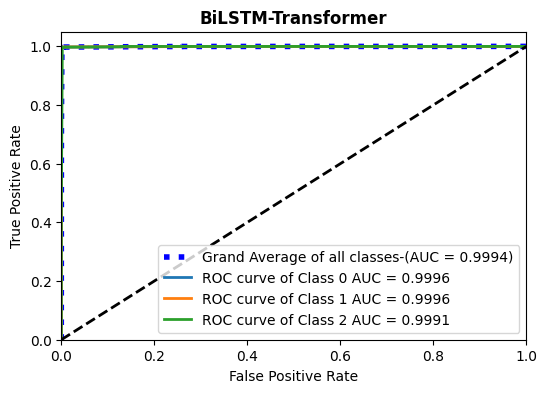

In [98]:
plot_multiclass_roc(y_test_classes_3, y_pred_3 , num_classes, "blue","BiLSTM-Transformer","./Picture/BiLSTM-Transformer_ROC.png")

### BiLSTM-transformer-对抗训练

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Bidirectional, LSTM, Flatten, BatchNormalization, LayerNormalization, Add
from tensorflow.keras.models import Model
import tensorflow_addons as tfa
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import GlorotUniform

# ------------- transformer_block函数 -------------
def transformer_block(x, head_size=32, num_heads=2, ff_dim=32, dropout=0.1):
    # 多头注意力
    attn_output = tfa.layers.MultiHeadAttention(head_size=head_size, num_heads=num_heads)([x, x, x])
    attn_output = Dropout(dropout)(attn_output)
    # 残差连接 + LayerNorm
    x = Add()([x, attn_output])
    x = LayerNormalization()(x)

    # 前馈网络
    ff_output = Dense(ff_dim, activation='relu')(x)
    ff_output = Dense(x.shape[-1])(ff_output)  # 输出维度要跟输入一样
    ff_output = Dropout(dropout)(ff_output)
    # 残差连接 + LayerNorm
    x = Add()([x, ff_output])
    x = LayerNormalization()(x)
    return x

# ------------- GPU加速配置 -------------
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# ------------- 数据准备 -------------
X = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y = np.argmax(dummy_y_train, axis=1)

# ------------- 定义模型函数 -------------
def create_model():
    input_layer = Input(shape=(X.shape[1], 1))
    initializer = GlorotUniform(seed=1)

    # BiLSTM
    x = Bidirectional(LSTM(64, return_sequences=True))(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    # Transformer Block (换成你给的版本)
    x = transformer_block(x, head_size=32, num_heads=2, ff_dim=64, dropout=0.2)

    # Flatten和输出
    x = Flatten()(x)
    output_layer = Dense(3, activation='softmax', dtype=tf.float32)(x)

    model = Model(inputs=input_layer, outputs=output_layer)

    opt = tf.keras.optimizers.Adam()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ------------- 对抗样本生成函数 -------------
@tf.function
def generate_adversarial_pgd(model, x, y, loss_fn, epsilon=0.001, alpha=0.0001, num_iter=10):
    x_adv = tf.identity(x)
    for _ in range(num_iter):
        with tf.GradientTape() as tape:
            tape.watch(x_adv)
            prediction = model(x_adv, training=True)
            loss = loss_fn(y, prediction)
        gradients = tape.gradient(loss, x_adv)
        x_adv = x_adv + alpha * tf.sign(gradients)
        x_adv = tf.clip_by_value(x_adv, x - epsilon, x + epsilon)
    return x_adv

# ------------- 5折交叉验证 -------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_list = []
precision_list = []
recall_list = []
f1_list = []

batch_size = 64
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\nFold {fold+1}")
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = dummy_y_train[train_idx], dummy_y_train[val_idx]

    assert len(X_train_fold) == len(y_train_fold), "训练集特征与标签数量不匹配"
    assert len(X_val_fold) == len(y_val_fold), "验证集特征与标签数量不匹配"

    y_val_classes = np.argmax(y_val_fold, axis=1)
    print(f"数据验证: X_val={len(X_val_fold)}, y_val={len(y_val_classes)}")

    train_dataset = tf.data.Dataset.from_tensor_slices((X_train_fold, y_train_fold))
    train_dataset = train_dataset.shuffle(1024).batch(batch_size).prefetch(tf.data.AUTOTUNE)

    model = create_model()
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    for epoch in range(5):
        print(f"\nEpoch {epoch+1}/5")

        if epoch < 4:
            model.fit(
                train_dataset,
                epochs=1,
                validation_data=(X_val_fold, y_val_fold),
                callbacks=[early_stopping],
                verbose=1
            )
        else:
            print("Adversarial training phase...")
            total_samples = len(X_train_fold)
            for i in range(0, len(X_train_fold), batch_size):
                end_idx = min(i + batch_size, total_samples)
                x_batch = X_train_fold[i:end_idx]
                y_batch = y_train_fold[i:end_idx]

                if len(x_batch) == 0:
                    continue

                tensor_x_batch = tf.convert_to_tensor(x_batch, dtype=tf.float32)
                tensor_y_batch = tf.convert_to_tensor(y_batch, dtype=tf.float32)

                adversarial_x_batch = generate_adversarial_pgd(model, tensor_x_batch, tensor_y_batch, loss_fn)

                mixed_x_batch = tf.concat([tensor_x_batch, adversarial_x_batch], axis=0)
                mixed_y_batch = tf.concat([tensor_y_batch, tensor_y_batch], axis=0)

                model.fit(
                    mixed_x_batch, mixed_y_batch,
                    batch_size=batch_size,
                    epochs=1,
                    verbose=1
                )

    y_pred_4 = model.predict(X_val_fold, verbose=0)
    assert len(y_pred_4) == len(X_val_fold), "预测结果数量异常"

    y_pred_classes_4 = np.argmax(y_pred_4, axis=1)
    assert len(y_pred_classes_4) == len(y_val_classes), f"样本数不匹配: {len(y_pred_classes_4)} vs {len(y_val_classes)}"

    acc_list.append(accuracy_score(y_val_classes, y_pred_classes_4))
    precision_list.append(precision_score(y_val_classes, y_pred_classes_4, average=None))
    recall_list.append(recall_score(y_val_classes, y_pred_classes_4, average=None))
    f1_list.append(f1_score(y_val_classes, y_pred_classes_4, average=None))

# ------------- 修改后的结果统计函数 -------------
def summarize(name, scores):
    scores = np.array(scores)
    mean = np.mean(scores, axis=0)
    std = np.std(scores, axis=0)
    lower = mean - 1.96 * std / np.sqrt(scores.shape[0])
    upper = mean + 1.96 * std / np.sqrt(scores.shape[0])

    for i in range(len(mean)):
        print(f"{name} Class {i}: {mean[i]:.4f}, Std={std[i]:.4f}, (95% CI: [{lower[i]:.4f}, {upper[i]:.4f}])")

print("\nCross-Validation Results:")
summarize("Accuracy", [np.array([a, a, a]) for a in acc_list])
summarize("Precision", precision_list)
summarize("Recall", recall_list)
summarize("F1", f1_list)


d:\Anaconda\envs\pycharm\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
d:\Anaconda\envs\pycharm\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


829/829 [==============================] - 212s 255ms/step
Accuracy: 0.8368978914412886
              precision    recall  f1-score   support

           0       0.63      1.00      0.78      6697
           1       0.98      0.98      0.98     10078
           2       0.96      0.58      0.72      9736

    accuracy                           0.84     26511
   macro avg       0.86      0.85      0.83     26511
weighted avg       0.88      0.84      0.83     26511



In [11]:
evaluate_model_performance(y_test_classes_4, y_pred_classes_4)

Overall Accuracy: 0.8368978914412886
Overall Precision (Macro Average): 0.8574
Overall Recall (Macro Average): 0.8521
Overall F1 Score (Macro Average): 0.8255

Metrics for Class 0:
Accuracy: 0.8368978914412886
Precision: 0.6335
Recall: 0.9990
F1 Score: 0.7753

Metrics for Class 1:
Accuracy: 0.8368978914412886
Precision: 0.9777
Recall: 0.9771
F1 Score: 0.9774

Metrics for Class 2:
Accuracy: 0.8368978914412886
Precision: 0.9612
Recall: 0.5803
F1 Score: 0.7237


In [14]:
# 计算指标
num_classes = 3  # 假设有 3 个类别
avg_fpr, avg_fdr, avg_for, avg_fnr = calculate_metrics_multiclass(y_test_classes_4, y_pred_classes_4, num_classes)

Overall FPR: 0.07711624399577331
Overall FDR: 0.14684979844107934
Overall FOR: 0.07216096927950238
Overall FNR: 0.1521892997968353


In [28]:
avg_tnr, avg_mcc, avg_npv = calculate_multiclass_tnr_mcc_npv(y_test_classes_4, y_pred_classes_4, num_classes)

Overall TNR: 0.926158401269977
Overall MCC: 0.7777329072968984
Overall NPV: 0.9284089626874504


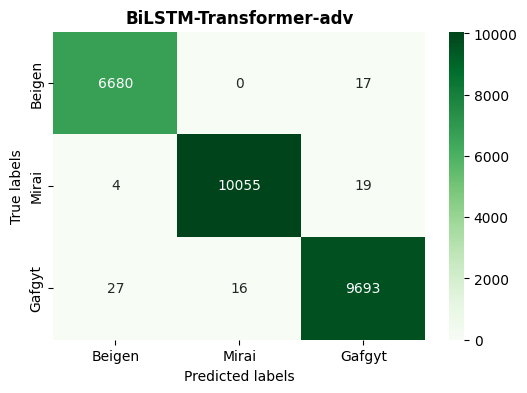

In [19]:
plot_confusion_matrix(y_test_classes_4, y_pred_classes_4, "Greens","BiLSTM-Transformer-adv","./Picture/BiLSTM-transformer-adv_juzehn.png")

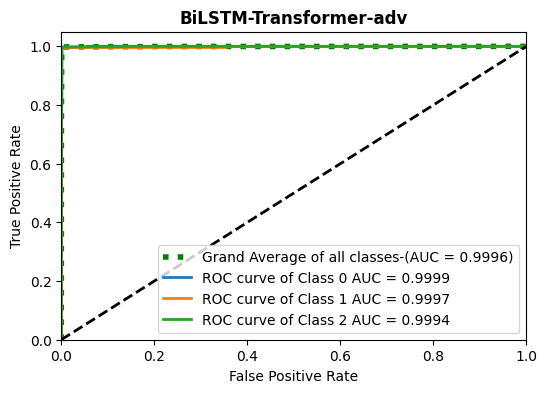

In [20]:
plot_multiclass_roc(y_test_classes_4, y_pred_4 , num_classes, "green","BiLSTM-Transformer-adv","./Picture/BiLSTM-transformer-adv_ROC.png")